
1. Importing Librairies 
2. Seprating IV and DV 
```
x=df_index.iloc[:,:-1] #Elminated Last column
y = df_index.iloc[::,-1]# Selected only Last Column 
```
3. ALL SKLEARN LIBRARIES 
```
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
regression =LinearRegression() 
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',
                                   cv=3)
```
4. Splitting Data Set
```
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
```
5. 

```
scalar = StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)
```
6. Predicting 
```
y_pred = regression.predict(x_test)

regression.predict(scaler.transform([[76]]))
```


**MLR**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
df_index = pd.read_csv('economic_index.csv')

In [ ]:
df_index.head(4) 

,year,month,interest_rate,unemployment_rate,index_price
0,2015,1,2.1,5.6,15000
1,2015,6,2.4,5.8,15500
2,2015,7,2.0,5.7,16000
3,2015,4,2.3,5.4,16200


In [8]:
df_index.drop(columns=['year','month'],axis = 1 ,inplace=True)


In [9]:
df_index.head(4)

,interest_rate,unemployment_rate,index_price
0,2.1,5.6,15000
1,2.4,5.8,15500
2,2.0,5.7,16000
3,2.3,5.4,16200


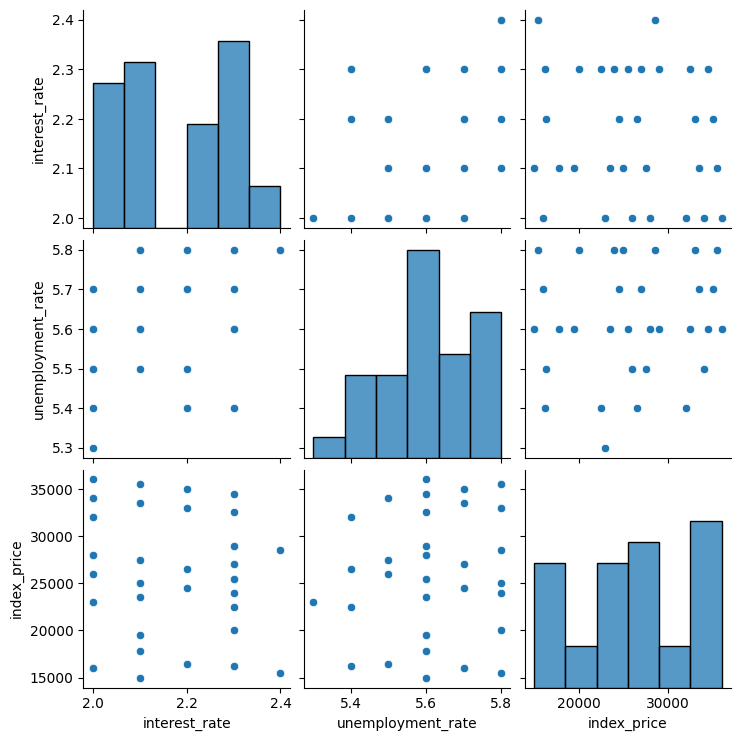

In [10]:
sns.pairplot(df_index)

In [11]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,0.326292,-0.136055
unemployment_rate,0.326292,1.000000,0.098885
index_price,-0.136055,0.098885,1.000000


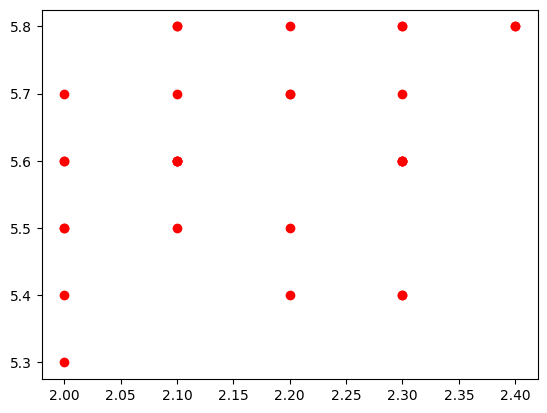

In [13]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')

**Seprating Features**

In [ ]:
x=df_index.iloc[:,:-1] #Elminated Last column
y = df_index.iloc[::,-1]# Selected only Last Column 


**splitting**

In [21]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [36]:
sns.regplot(df_index['interest_rate'] , df_index['index_price'])  

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
from sklearn.preprocessing import StandardScaler 

In [ ]:
scalar = StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test) 

In [ ]:
from sklearn.linear_model import LinearRegression
regression =LinearRegression() 

In [40]:
regression.fit(x_train,y_train)

LinearRegression()

**Cross Validation**

In [44]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',
                                   cv=3)
#And also 3 different 3 mse

#Cross validation cv = 5 means taking all the parts of dataSet and divide it by 3 and every time ypu run the data TEst for train and test changess


In [46]:
cross_validation  # 3 NMSE
np.mean(cross_validation)

np.float64(-48023783.08917555)

Prediction


In [47]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [48]:
y_pred = regression.predict(x_test)

In [49]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

50284102.92419676
6168.539790783896
7091.1284662031585


In [50]:
# R Squared
from sklearn.metrics import r2_score 

In [51]:
score = r2_score(y_test,y_pred)
print(score) 

-0.8534928624119338


In [52]:
1 - (1 - score) * (len(y_test)- 1) / (len(y_test) - x_test.shape[1] - 1)

-1.5948900073767076

**With OLS**

In [53]:
import statsmodels.api as sm 

In [54]:
model =sm.OLS(y_train,x_train).fit()

In [55]:
prediction= model.predict(x_test)
print(prediction)

[-2676.53544123 -4611.54603445  2304.17165623 -2676.53544123
   369.16106301 -2676.53544123 -2401.76054716  -323.56933954]


**Assumptions**

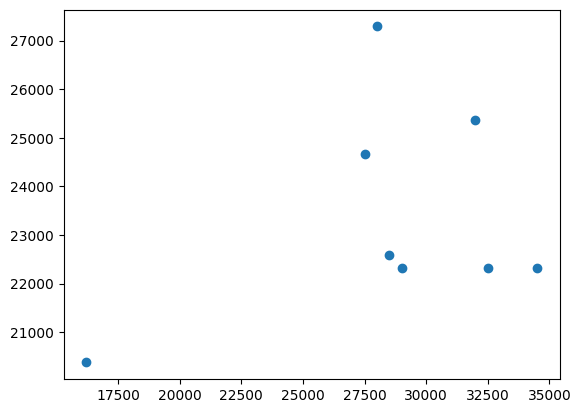

In [57]:
plt.scatter(y_test,y_pred)

In [58]:
residuals = y_test-y_pred
print(residuals)

27    12189.578919
3     -4175.410487
19      708.871822
23    10189.578919
22     6643.882415
21     6689.578919
20     5914.804025
18     2836.612818
Name: index_price, dtype: float64


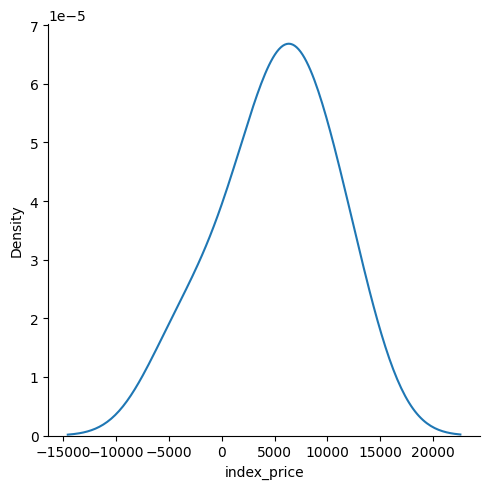

In [59]:
sns.displot(residuals,kind='kde')

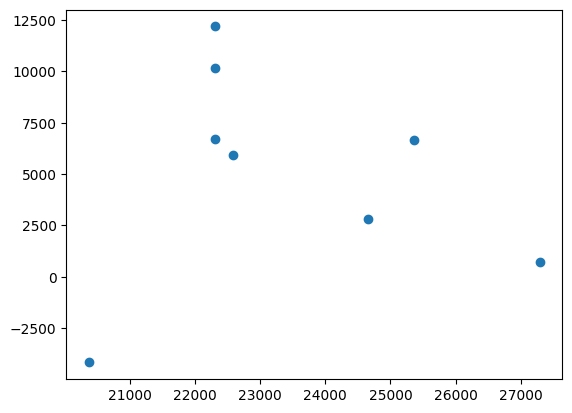

In [ ]:
plt.scatter(y_pred,residuals)#Data do not foollows any pattern it is Uniformly Distributed